# Table of Contents
* [Introduction](#Introduction)
* [Import Modules](#Import-Modules)
* [Set R Matrix](#Set-R-Matrix)
	* [R Matrix Map](#R-Matrix-Map)
	* [R Matrix Network Diagram](#R-Matrix-Network-Diagram)
* [Set Q Matrix](#Set-Q-Matrix)
* [Learning Rate, $\alpha$](#Learning-Rate,-$\alpha$)
* [Q Learning: Basic Case 1: $\epsilon$-greedy policy, with $\gamma$=0.2](#Q-Learning:-Basic-Case-1:-$\epsilon$-greedy-policy,-with-$\gamma$=0.2)
	* [Q Learning with $\epsilon$-greedy policy results](#Q-Learning-with-$\epsilon$-greedy-policy-results)
	* [Q Matrix for $\epsilon$-greedy](#Q-Matrix-for-$\epsilon$-greedy)
* [Q Learning: Case 4: Different Policy: Softmax, with $\gamma$=0.2](#Q-Learning:-Case-4:-Different-Policy:-Softmax,-with-$\gamma$=0.2)
	* [Softmax impulse Response](#Softmax-impulse-Response)
	* [Q Learning with Softmax Results](#Q-Learning-with-Softmax-Results)
* [Comparisons](#Comparisons)
	* [FInal Q Matrices of $\epsilon$-greedy and Softmax](#FInal-Q-Matrices-of-$\epsilon$-greedy-and-Softmax)
	* [Comparison of V Values](#Comparison-of-V-Values)
	* [Comparison of number of Steps](#Comparison-of-number-of-Steps)
* [$\epsilon$-greedy with with $\gamma$=0.8](#$\epsilon$-greedy-with-with-$\gamma$=0.8)
	* [Q Learning with $\epsilon$-greedy policy results with $\gamma$=0.8](#Q-Learning-with-$\epsilon$-greedy-policy-results-with-$\gamma$=0.8)
	* [Q Matrix for $\epsilon$-greedy with $\gamma$=0.8](#Q-Matrix-for-$\epsilon$-greedy-with-$\gamma$=0.8)
* [Softmax with with $\gamma$=0.8](#Softmax-with-with-$\gamma$=0.8)
	* [Q Learning with Softmax Results](#Q-Learning-with-Softmax-Results)
* [Comparisons](#Comparisons)
	* [FInal Q Matrices of $\epsilon$-greedy and Softmax](#FInal-Q-Matrices-of-$\epsilon$-greedy-and-Softmax)
	* [Comparison of V Values](#Comparison-of-V-Values)
	* [Comparison of number of Steps](#Comparison-of-number-of-Steps)
* [Fixed Learning Rate + $\epsilon$-greedy policy](#Fixed-Learning-Rate-+-$\epsilon$-greedy-policy)
	* [$\epsilon$-greedy with $\alpha$=0.2](#$\epsilon$-greedy-with-$\alpha$=0.2)
	* [$\epsilon$-greedy with $\alpha$=0.8](#$\epsilon$-greedy-with-$\alpha$=0.8)
* [Extensions](#Extensions)


# Introduction

**Here we are testing a deterministic Q Learning algorithm with the $\epsilon$-greedy and softmax policy**

# Import Modules

In [2]:
#Imports
import numpy as np
import random
from random import randrange
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
c= sns.plotting_context("poster", font_scale=3, rc={"lines.linewidth": 6})
plt.style.use('ggplot')
from IPython.display import display, Math, Latex
%matplotlib inline

# Set R Matrix

In [3]:
R = np.zeros((6,6))
R

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [4]:
#fill with values
x0 = [100., -50.,-40.,30.,-20. ,-60.]
x1 = [-10., -10., -10. , -10., 0. ,0]
x2 = [100. ,0. , -10., 0., 0. ,0.]
x3 = [-10. ,0. ,   0. , -10.  ,-10. ,0.]
x4 = [-10. ,0. , -10. , 0. , -10.,0.]
x5 = [-10., 0., 10., 0. ,0.,-10.]

In [5]:
R[0] =x0;
R[1] =x1;
R[2] =x2;
R[3] =x3;
R[4] =x4;
R[5] =x5;
R  =  R.astype(float)
print('R Matrix \n',R)

R Matrix 
 [[ 100.  -50.  -40.   30.  -20.  -60.]
 [ -10.  -10.  -10.  -10.    0.    0.]
 [ 100.    0.  -10.    0.    0.    0.]
 [ -10.    0.    0.  -10.  -10.    0.]
 [ -10.    0.  -10.    0.  -10.    0.]
 [ -10.    0.   10.    0.    0.  -10.]]


## R Matrix Map

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

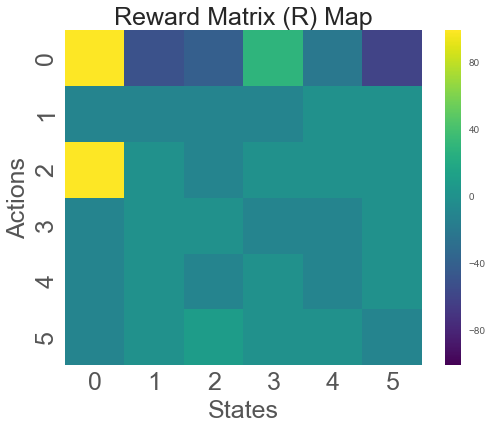

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(R, cmap=plt.cm.viridis)
plt.title('Reward Matrix (R) Map', fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

## R Matrix Network Diagram 

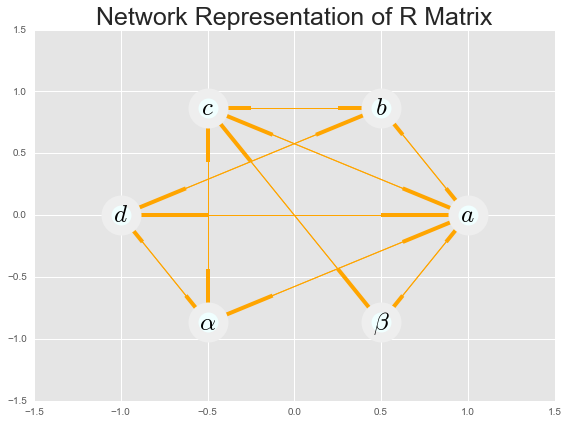

In [7]:
import networkx as nx
G = nx.from_numpy_matrix(R)
Gd = nx.DiGraph(G)
plt.figure(figsize=(8,6))
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
pos = nx.shell_layout(Gd)
nx.draw_networkx(Gd, pos, labels=labels, font_size =25, node_size=900, edge_color='#FFA500', node_color='#F0FFFF',
                linewidths=10)
plt.title('Network Representation of R Matrix', fontsize=25)
plt.tight_layout()

# Set Q Matrix

In [8]:
Q = np.zeros_like(R)
Q

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
max_iter = 1200

# Learning Rate, $\alpha$

**We define our learning rate as a function of our number of episodes, n. This ensures a more dynamic learning rate as opposed a static value. We define our alpha s follows: $$\alpha = {1 \over \sqrt(n+2)}$$**

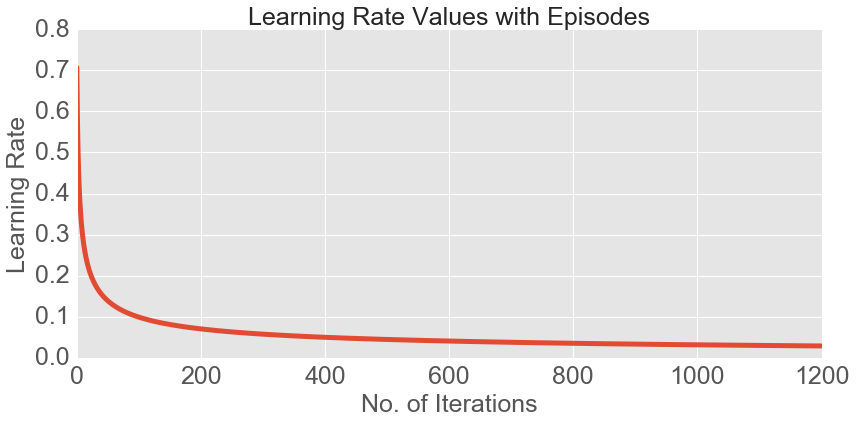

In [10]:
plt.figure(figsize=(12,6))
plt.plot(1/np.sqrt((np.arange(1200)+2)), linewidth =5)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel('Learning Rate', fontsize=25)
plt.title('Learning Rate Values with Episodes', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

# Q Learning: Basic Case 1: $\epsilon$-greedy policy, with $\gamma$=0.2

In [11]:
#random initial positions
pos = [0,1,2,3,4,5]

In [12]:
move_greedy = []

def QLearning_epsilon(Q,R,explore,gamma,max_iter=max_iter):
            
    for episode in range(0, max_iter):
        #print('Start of episode: ', episode)
        #Random initial position
        initial_pos = random.choice(pos)
        #print(initial_pos)
        #learning rate
        learning_rate = 1 / (np.sqrt(episode + 2))
        
        #
        #two_terminal_in_a_row = -2
        step = 1
        #While we haven't reached our terminal state, continue searching
        #
        #while two_terminal_in_a_row < 0:
        while initial_pos != 0:   
            #It will be used later for the e-greedy policy
            greedy_threshold = random.uniform(0.0,1.0)
            
            
            #empty list which will be filled with all the available positions
            NEW_pos = []
            #the available position have to be one of the pos variable
            for next_pos in range(0, len(pos)): 
                #search only for positions with a value
                if np.isnan(R[initial_pos, next_pos]) == False:
                #Append to NEW_pos list the Q value of all the available positions
                    NEW_pos.append(Q[initial_pos, next_pos])
             
            #the maximum value of the above list. It will be used for the movement part
            greedy_Q = max(NEW_pos)
            
            #MOVEMENT PART
            
            #We follow the e-greedy policy
            if greedy_Q > 0.0 and greedy_threshold >= explore:
                #Find the index of the maximum Q value
                 next_state = NEW_pos.index(greedy_Q)
            else:
                #If the greedy_threshold is smaller than the exploration rate, then we select a position at random
                 next_state = randrange(0,len(NEW_pos))
                    
            
            
            #Decrease explore value very slowly in every iteration. This ensures that at the beginning, 
            #when most of the Q values are zeroes, that the algorithm has a higher chance of exploring and 
            #that are many iterations the chances of exploit are higher
            explore = explore * 0.999
            
                       
            #calculate max[Q(next s, all a)]
            list_Q = []
            for future_pos in range(0, len(pos)): 
                #check that the next position isn't empty
                if np.isnan(R[next_state, future_pos]) == False:
                    list_Q.append(Q[next_state, future_pos])
            #maximum Q
            maximum_Q = max(list_Q)
            
            #define dQ - update rule
            dQ = learning_rate*(R[initial_pos, next_state] + gamma* maximum_Q -  Q[initial_pos, next_state])
           
            #Q learning update
            Q[initial_pos, next_state] = Q[initial_pos, next_state] + dQ
            
            #calculate performance measure
            discrepancy.append(np.absolute(dQ))         
                     
            move_greedy.append(step)
            step = step + 1
            initial_pos = next_state
            #print('-----------------------------------')
            #print('Initial Position:', initial_pos)
            #print('-----------------------------------')

In [13]:
#Initialise performance measure, policy each time
discrepancy = []
QLearning_epsilon(Q,R,0.8,0.2)

## Q Learning with $\epsilon$-greedy policy results 

In [14]:
#calculate value
policy = np.argmax(Q, axis=1)
Value = (np.max(Q, axis=1))
print('Policy\n',policy)
print('V Values\n', Value)
print('Final Q Values:\n',Q)

Policy
 [0 2 0 2 2 2]
V Values
 [  0.           9.99999318 100.          19.99999343   9.99994249
  29.99997949]
Final Q Values:
 [[  0.           0.           0.           0.           0.           0.        ]
 [ -9.58056887  -7.49769422   9.99999318  -5.48764517   1.41725678
    5.06877808]
 [100.           1.98178175   9.92628679   3.86018217   1.91095719
    5.78549293]
 [ -9.48072439   1.58447315  19.99999343  -4.60677112  -5.26071096
    4.1296911 ]
 [ -8.38945079   1.42554249   9.99994249   2.91686545  -8.34715248
    4.73780648]
 [ -7.95945087   1.02614553  29.99997949   3.24042702   1.57937092
   -4.26730281]]


In [15]:
import tabulate 
from tabulate import tabulate as tb
print("Q Matrix \n",tb(Q, tablefmt="simple", numalign="left", floatfmt=".4f"))

Q Matrix 
 --------  -------  -------  -------  -------  -------
0.0000    0.0000   0.0000   0.0000   0.0000   0.0000
-9.5806   -7.4977  10.0000  -5.4876  1.4173   5.0688
100.0000  1.9818   9.9263   3.8602   1.9110   5.7855
-9.4807   1.5845   20.0000  -4.6068  -5.2607  4.1297
-8.3895   1.4255   9.9999   2.9169   -8.3472  4.7378
-7.9595   1.0261   30.0000  3.2404   1.5794   -4.2673
--------  -------  -------  -------  -------  -------


In [16]:
import pandas as pd
disc_pd = pd.Series(discrepancy)
mean_dis = disc_pd.rolling(window=100,center=False).mean()

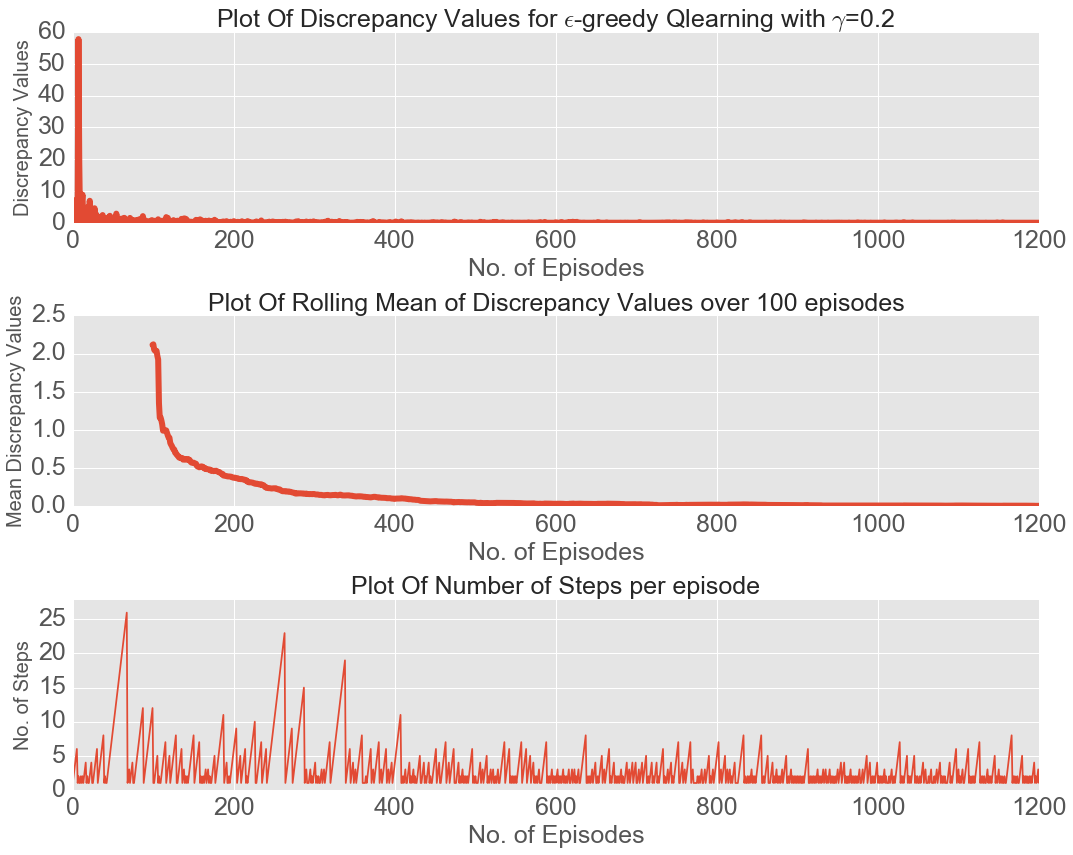

In [17]:
plt.figure(figsize=(15,12))

plt.subplot(311)
plt.plot(discrepancy, linewidth=6)
plt.title('Plot Of Discrepancy Values for $\epsilon$-greedy Qlearning with $\gamma$=0.2', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(312)
plt.title('Plot Of Rolling Mean with 100 epsodes')
plt.plot(mean_dis, linewidth=6)
plt.title('Plot Of Rolling Mean of Discrepancy Values over 100 episodes', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(313)
plt.plot(move_greedy)
plt.title('Plot Of Number of Steps per episode', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("No. of Steps", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(0, max(move_greedy)+2)
plt.xlim(0,max_iter)

plt.tight_layout()
plt.show()

## Q Matrix for $\epsilon$-greedy

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

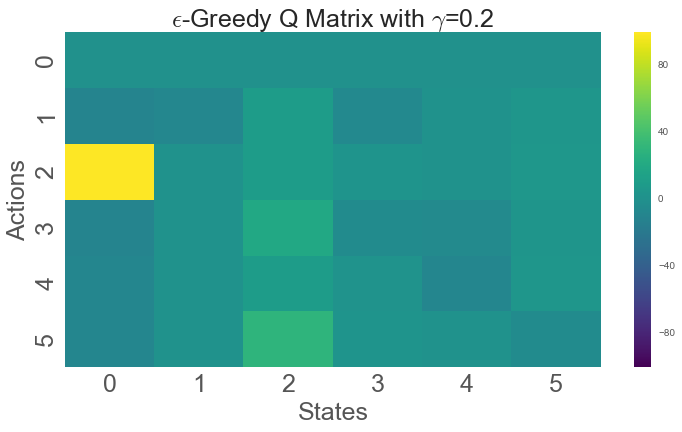

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(Q, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with $\gamma$=0.2", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Q Learning: Case 4: Different Policy: Softmax, with $\gamma$=0.2

## Softmax impulse Response

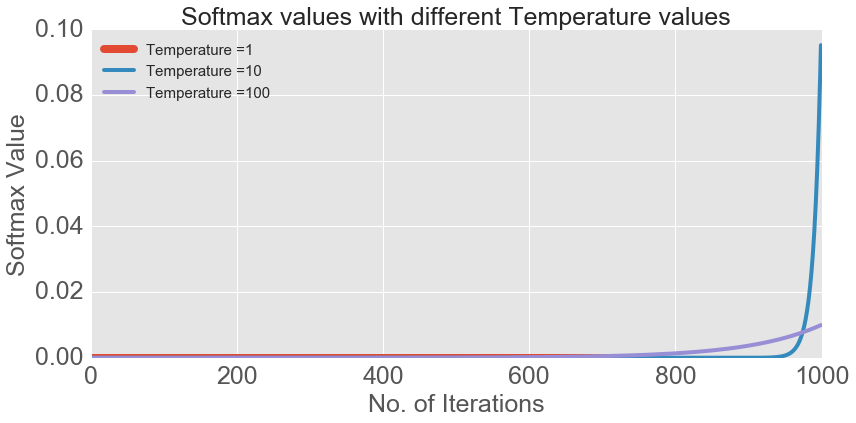

In [19]:
plt.figure(figsize=(12,6))
num = np.arange(1000)
plt.plot(np.exp(num/1)/sum(np.exp(num/1)),  linewidth=8, label='Temperature =1')
plt.plot(np.exp(num/10)/sum(np.exp(num/10)), linewidth=4, label='Temperature =10')
plt.plot(np.exp(num/100)/sum(np.exp(num/100)), linewidth=4, label='Temperature =100')
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel('Softmax Value', fontsize=25)
plt.title('Softmax values with different Temperature values', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc=2)
plt.tight_layout()

In [20]:
Q2 = np.zeros_like(R)
Q2

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [21]:
move_softmax = []
def QLearning_softmax(Q,R, gamma, temperature=10, max_iter=max_iter): 
    
#Initiate episodes
    for episode in range(0, max_iter):
        #print('Start of episode: ', episode)
        #Random initial position
        initial_pos = np.random.choice(pos)
        #learning rate, alpha
        alpha = 1 / (np.sqrt(episode + 2))    
        
        step = 1   
        #While we haven't reached our terminal state, continue searching
            
        while initial_pos != 0:    
           
           #It will be used later for the softmax policy
            threshold = random.uniform(0.0,1.0)
            prob_t = [0,0,0,0,0,0]       #initialise
                             
            #temperature = 10.0
            #empty list which will be filled with all the available positions
            NEW_pos = []
            #the available position have to be one of the pos variable
            for next_pos in range(len(pos)): 
                #search only for positions with a value
                #if np.isnan(R[initial_pos, next_pos]) == False:
                #Append to NEW_pos list the Q value of all the available positions
                    NEW_pos.append(Q[initial_pos, next_pos])
                     
            #MOVEMENT PART
            for a in range(len(NEW_pos)):
                prob_t[a] = np.exp(NEW_pos[a]/temperature)  #calculate numerators
    
            #numpy matrix element-wise division for denominator (sum of numerators)
            prob_t = prob_t / sum(prob_t)
            prob = list(prob_t)
                         
            counter = 0
            #We follow the softmax policy
            for i in range(len(NEW_pos)):
                if threshold <= prob[i] + counter:
                    break
                    
                counter = counter + prob_t[i]
            next_state = i
                
                #Decrease explore value very slowly in every iteration. This ensures that at the beginning, 
                #when most of the Q values are zeroes, that the algorithm has a higher chance of exploring and 
                #that are many iterations the chances of exploit are higher
                #temperature = temperature * 0.99999
                
        
            #calculate max[Q(next s, all a)]
            list_Q = []
            for future_pos in range(len(pos)): 
                #check that the next position isn't empty
                #if np.isnan(R[next_state, future_pos]) == False:
                    list_Q.append(Q[next_state, future_pos])
            #maximum Q
            maximum_Q = max(list_Q)
             
            #define dQ - update rule
            dQ = alpha*(R[initial_pos, next_state] + gamma* maximum_Q -  Q2[initial_pos, next_state])
           
            #Q learning update
            Q2[initial_pos, next_state] = Q2[initial_pos, next_state] + dQ
            
            #calculate performance measure
            discrepancy2.append(np.absolute(dQ))
            move_softmax.append(step)
            step = step + 1
            
            #Set the next state as initial position
            #If it is zero, then it will exit the loop and the next episode will begin
              
            #if initial_pos == 0 and initial_pos == next_state + NEW_pos.index(greedy_Q):
            #   two_terminal_in_a_row = two_terminal_in_a_row + 1
            #print([initial_pos, next_state])
            #print(next_state)
            initial_pos = next_state

In [22]:
discrepancy2 = []
QLearning_softmax(Q2,R,0.2)

## Q Learning with Softmax Results

In [23]:
#calculate policy
policy2 = (np.argmax(Q2, axis=1))
#calculate value
Value2 = (np.max(Q2, axis=1))
print('Policy\n',policy)
print('V Values\n', Value)
print('Final Q Values:\n',Q2)

Policy
 [0 2 0 2 2 2]
V Values
 [  0.           9.99999318 100.          19.99999343   9.99994249
  29.99997949]
Final Q Values:
 [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -9.23081396e+00  -8.44565594e+00   9.88793815e+00  -5.63479383e+00
    1.64019052e+00   5.83282248e+00]
 [  1.00000000e+02   0.00000000e+00  -8.70849735e+00   4.61880215e-02
    0.00000000e+00   6.85457672e-01]
 [ -9.40323482e+00   1.20257538e+00   1.99999663e+01  -4.78255524e+00
   -7.18251609e+00   5.40816307e+00]
 [ -7.39545518e+00   1.51421367e+00   9.81230515e+00   3.87084648e+00
   -7.57782670e+00   5.81412760e+00]
 [ -8.80470922e+00   1.09759835e+00   2.99999970e+01   3.01364774e+00
    9.85598410e-01  -5.38598642e+00]]


In [24]:
disc_pd2 = pd.Series(discrepancy2)
mean_dis2 = disc_pd2.rolling(window=100,center=False).mean()

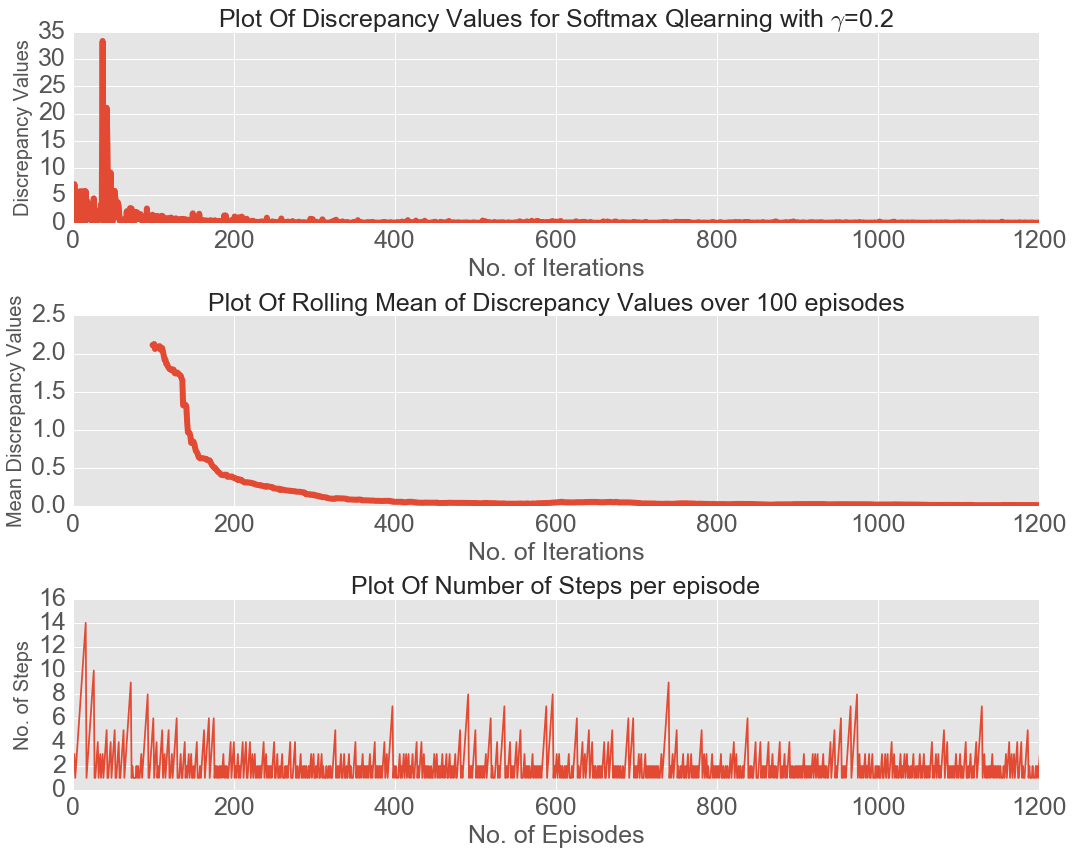

In [25]:
#plot discrepancy
plt.figure(figsize=(15,12))

plt.subplot(311)
plt.plot(discrepancy2, linewidth=6)
plt.title('Plot Of Discrepancy Values for Softmax Qlearning with $\gamma$=0.2', fontsize=25)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(312)
plt.title('Pot Of Rolling Mean with 100 epsodes')
plt.plot(mean_dis2, linewidth=6)
plt.title('Plot Of Rolling Mean of Discrepancy Values over 100 episodes', fontsize=25)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(313)
plt.plot(move_softmax)
plt.title('Plot Of Number of Steps per episode', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("No. of Steps", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(0, max(move_softmax)+2)
plt.xlim(0,max_iter)

plt.tight_layout()

# Comparisons

## FInal Q Matrices of $\epsilon$-greedy and Softmax

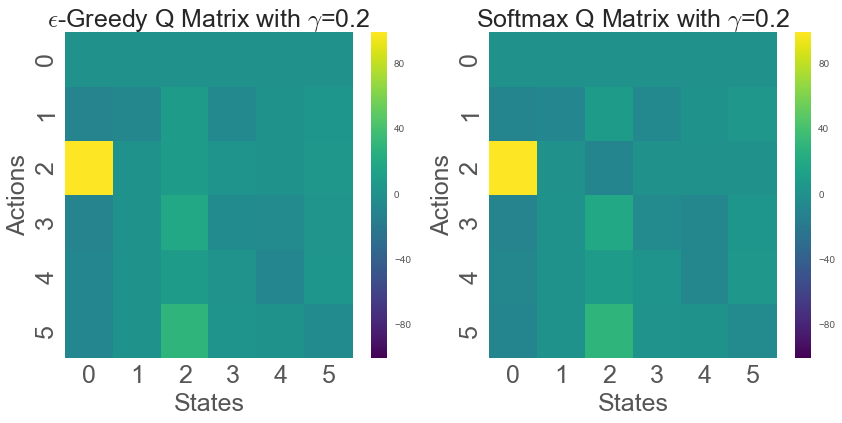

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.heatmap(Q, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with $\gamma$=0.2", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(122)
sns.heatmap(Q2, cmap=plt.cm.viridis)
plt.title("Softmax Q Matrix with $\gamma$=0.2", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

## Comparison of V Values 

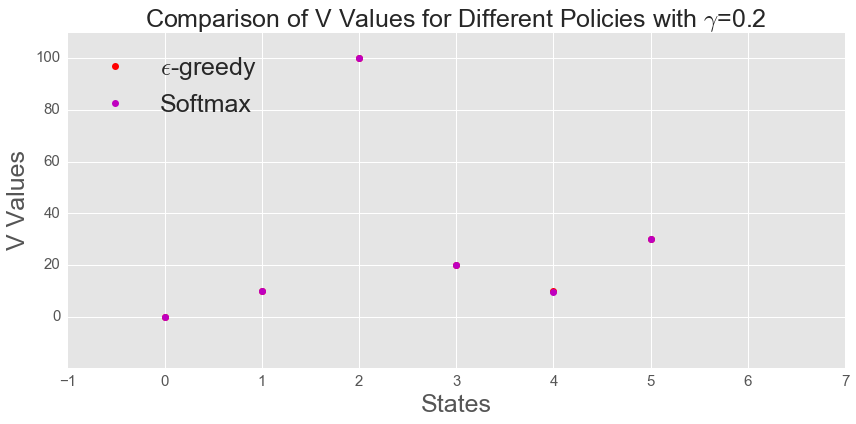

In [27]:
plt.figure(figsize=(12,6))
p1= plt.plot(Value,'ro', label='$\epsilon$-greedy')
p2= plt.plot(Value2,'mo', label='Softmax')

plt.title("Comparison of V Values for Different Policies with $\gamma$=0.2",  fontsize=25)
plt.ylim(Q.min()-10, Q.max()+10)
plt.xlim(-1,len(Q)+1)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.legend(fontsize=25, loc=2)
plt.tight_layout()

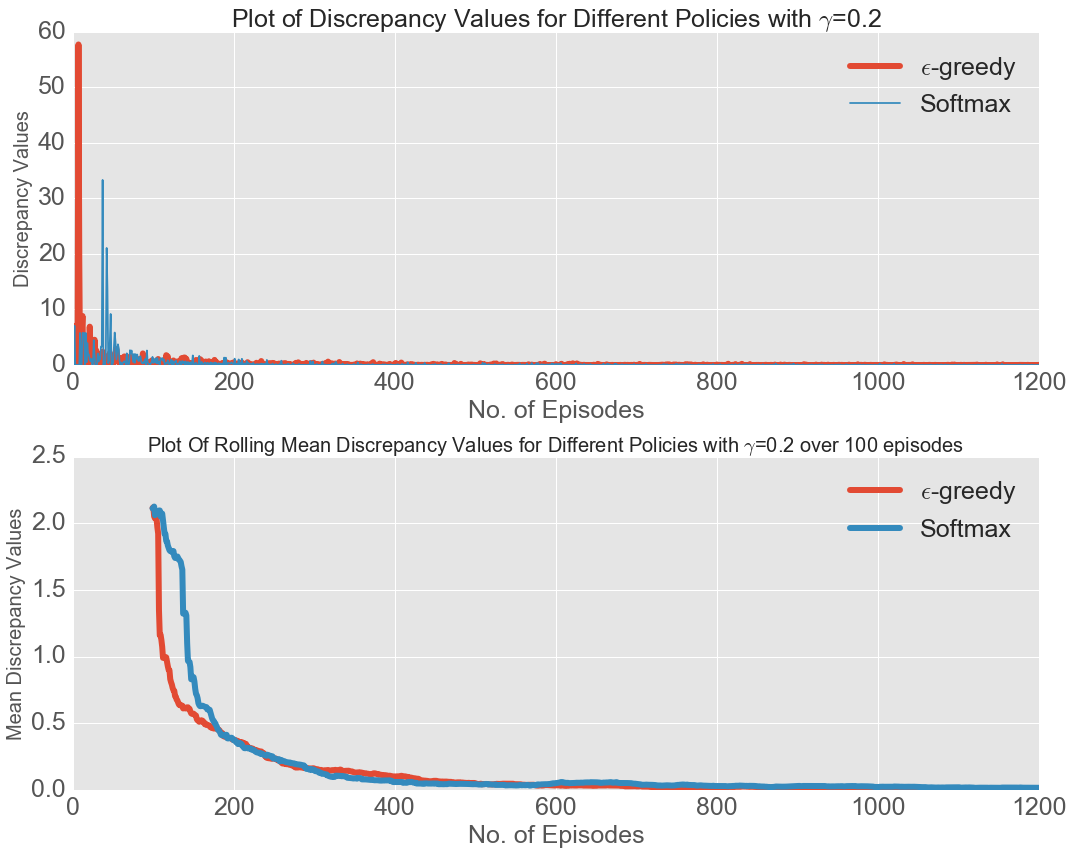

In [28]:
plt.figure(figsize=(15,12))

plt.subplot(211)

plt.plot(discrepancy, linewidth=6, label='$\epsilon$-greedy')
plt.plot(discrepancy2, label='Softmax')

plt.title('Plot of Discrepancy Values for Different Policies with $\gamma$=0.2', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.legend(fontsize=25, loc=1)
plt.xlim(0,max_iter)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(212)

plt.plot(mean_dis, linewidth=6, label='$\epsilon$-greedy')
plt.plot(mean_dis2, linewidth=6,label='Softmax')

plt.title('Plot Of Rolling Mean Discrepancy Values for Different Policies with $\gamma$=0.2 over 100 episodes', fontsize=20)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.legend(fontsize=25, loc=1)
plt.xlim(0,max_iter)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.tight_layout()

## Comparison of number of Steps 

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text yticklabel objects>)

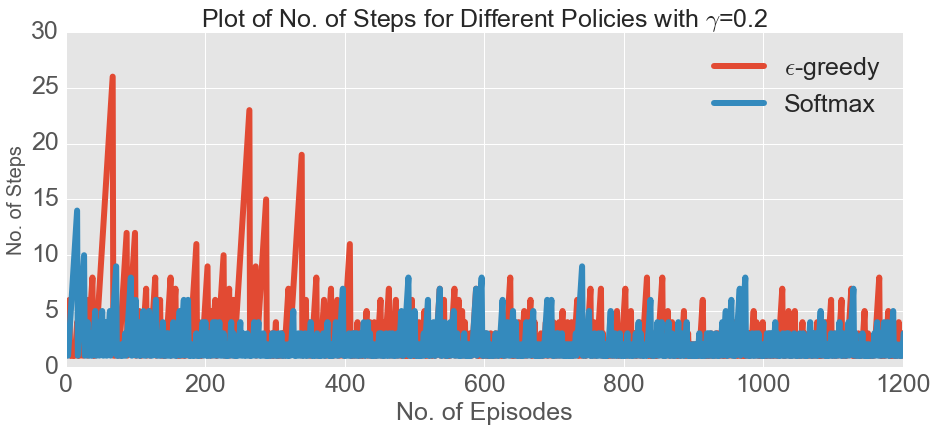

In [29]:
plt.figure(figsize=(15,6))
plt.plot(move_greedy, linewidth=6, label='$\epsilon$-greedy')
plt.plot(move_softmax, linewidth=6,label='Softmax')

plt.title('Plot of No. of Steps for Different Policies with $\gamma$=0.2', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("No. of Steps", fontsize=20)
plt.legend(fontsize=25, loc=1)
plt.xlim(0,max_iter)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# $\epsilon$-greedy with with $\gamma$=0.8

In [30]:
Q = np.zeros_like(R)
Q

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [31]:
#Initialise performance measure, policy each time
discrepancy = []
QLearning_epsilon(Q,R,0.8,0.8)

## Q Learning with $\epsilon$-greedy policy results with $\gamma$=0.8

In [32]:
#calculate value
policy = np.argmax(Q, axis=1)
Value = (np.max(Q, axis=1))
print('Policy\n',policy)
print('V Values\n', Value)
print('Final Q Values:\n',Q)

Policy
 [0 2 0 2 5 2]
V Values
 [  0.          69.99971241 100.          79.99996629  71.99954943
  89.99999999]
Final Q Values:
 [[  0.           0.           0.           0.           0.           0.        ]
 [ -8.47516088  28.85501922  69.99971241  38.88327287  42.33194567
   49.16925676]
 [100.          49.2112256   66.77996037  62.72875357  56.13899718
   70.7270934 ]
 [ -8.41404132  42.44448673  79.99996629  43.04145526  29.95537957
   34.96718119]
 [ -7.14267796  43.65962658  63.78008714  53.72862296  37.81542323
   71.99954943]
 [ -8.71677981  42.32426539  89.99999999  56.41084873  41.65347906
   55.01128242]]


In [33]:
disc_pd = pd.Series(discrepancy)
mean_dis = disc_pd.rolling(window=100,center=False).mean()

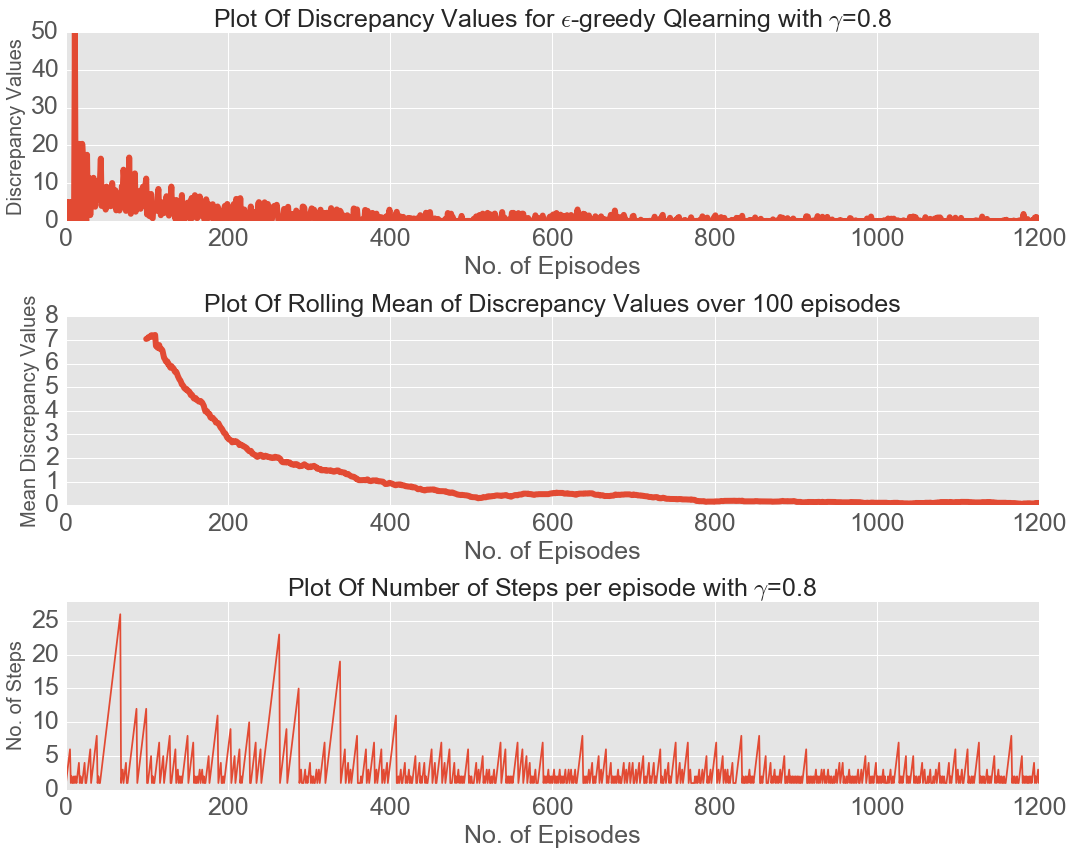

In [34]:
#plot discrepancy
plt.figure(figsize=(15,12))

plt.subplot(311)
plt.plot(discrepancy, linewidth=6)
plt.title('Plot Of Discrepancy Values for $\epsilon$-greedy Qlearning with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(312)
plt.title('Pot Of Rolling Mean with 100 epsodes with $\gamma$=0.8')
plt.plot(mean_dis, linewidth=6)
plt.title('Plot Of Rolling Mean of Discrepancy Values over 100 episodes', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(313)
plt.plot(move_greedy)
plt.title('Plot Of Number of Steps per episode with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("No. of Steps", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(0, max(move_greedy)+2)
plt.xlim(0,max_iter)

plt.tight_layout()
plt.show()

## Q Matrix for $\epsilon$-greedy with $\gamma$=0.8

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

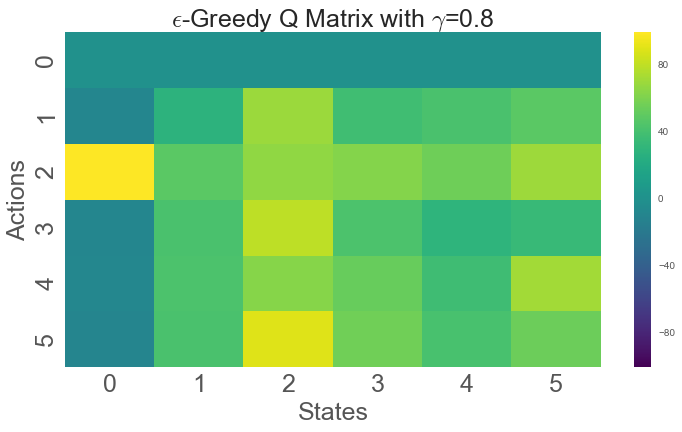

In [35]:
plt.figure(figsize=(12,6))

sns.heatmap(Q, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with $\gamma$=0.8", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Softmax with with $\gamma$=0.8

In [36]:
Q2 = np.zeros_like(R)
Q2

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [37]:
discrepancy2 = []
QLearning_softmax(Q2,R,0.8)

## Q Learning with Softmax Results

In [38]:
#calculate policy
policy2 = (np.argmax(Q2, axis=1))
#calculate value
Value2 = (np.max(Q2, axis=1))
print('Policy\n',policy)
print('V Values\n', Value)
print('Final Q Values:\n',Q2)

Policy
 [0 2 0 2 5 2]
V Values
 [  0.          69.99971241 100.          79.99996629  71.99954943
  89.99999999]
Final Q Values:
 [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -8.82286442e+00  -5.33290905e+00   1.60866279e+01  -8.00210131e+00
    1.90579534e+01   7.19801580e+01]
 [  1.00000000e+02   5.67413332e-01  -3.01873218e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.98943621e+00   4.23951903e-01   8.00000000e+01  -7.88675135e+00
   -7.37096852e+00   4.86697100e+00]
 [ -7.66364975e+00   0.00000000e+00   0.00000000e+00   6.39975031e+01
   -1.14045299e+00   2.35303210e+01]
 [ -4.58012574e+00   2.80690267e+00   8.99999998e+01   1.19578487e+01
    1.24141733e-02  -6.41135884e-01]]


In [39]:
disc_pd2 = pd.Series(discrepancy2)
mean_dis2 = disc_pd2.rolling(window=100,center=False).mean()

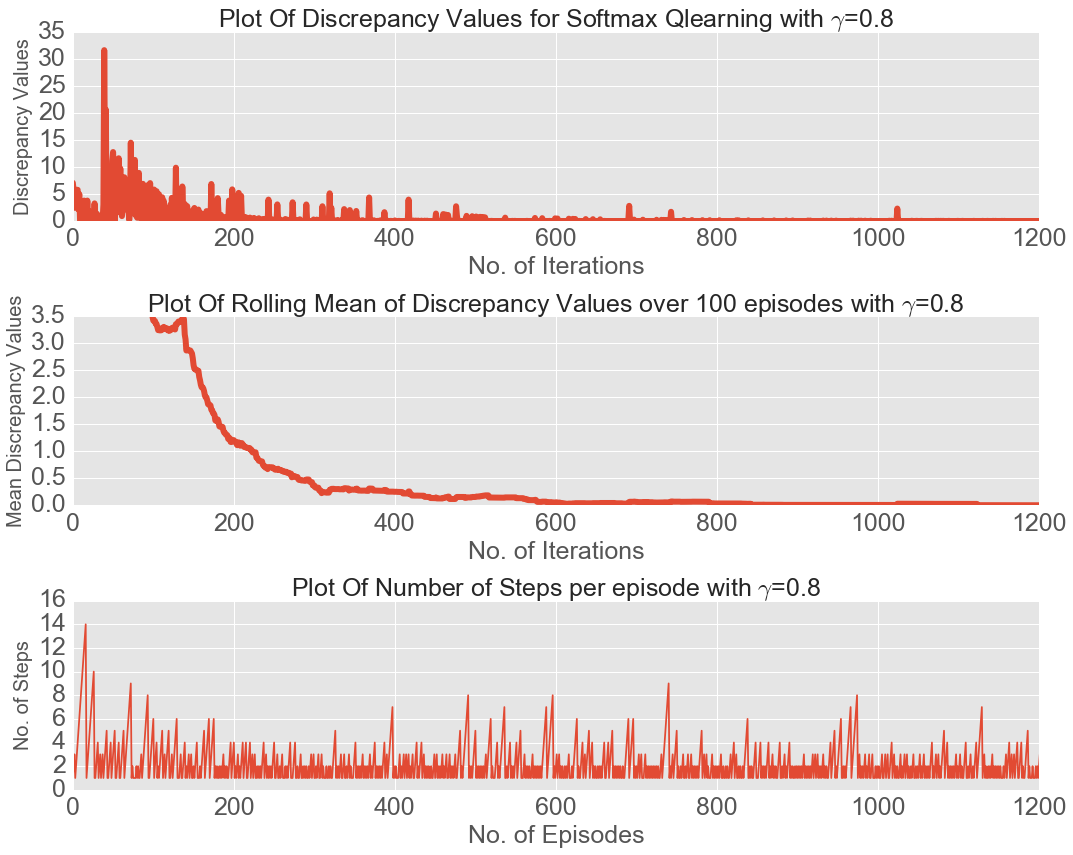

In [40]:
#plot discrepancy
plt.figure(figsize=(15,12))

plt.subplot(311)
plt.plot(discrepancy2, linewidth=6)
plt.title('Plot Of Discrepancy Values for Softmax Qlearning with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(312)
plt.title('Pot Of Rolling Mean with 100 epsodes')
plt.plot(mean_dis2, linewidth=6)
plt.title('Plot Of Rolling Mean of Discrepancy Values over 100 episodes with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)

plt.subplot(313)
plt.plot(move_softmax)
plt.title('Plot Of Number of Steps per episode with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("No. of Steps", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(0, max(move_softmax)+2)
plt.xlim(0,max_iter)

plt.tight_layout()

# Comparisons

## FInal Q Matrices of $\epsilon$-greedy and Softmax

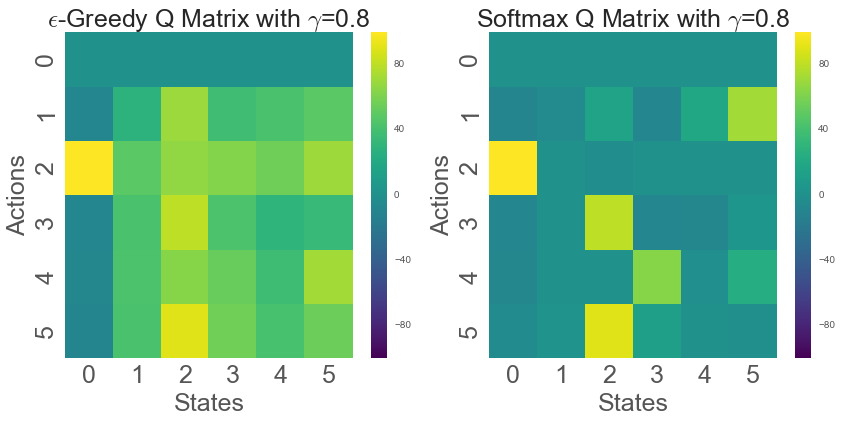

In [41]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.heatmap(Q, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with $\gamma$=0.8", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(122)
sns.heatmap(Q2, cmap=plt.cm.viridis)
plt.title("Softmax Q Matrix with $\gamma$=0.8", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

## Comparison of V Values 

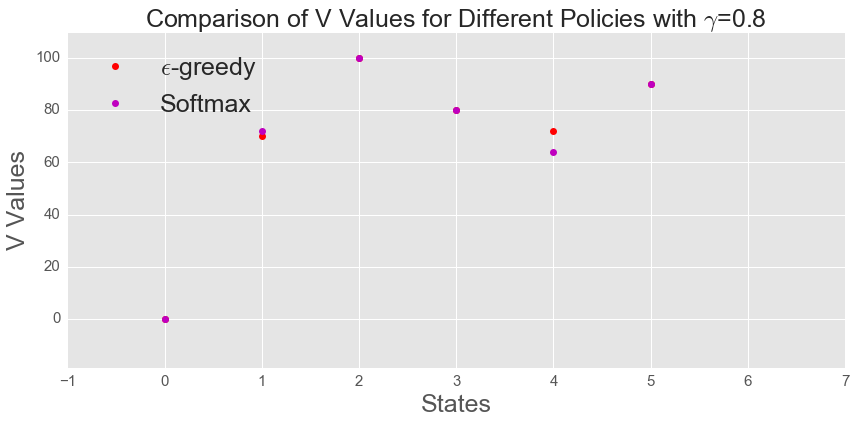

In [42]:
plt.figure(figsize=(12,6))
p1= plt.plot(Value,'ro', label='$\epsilon$-greedy')
p2= plt.plot(Value2,'mo', label='Softmax')

plt.title("Comparison of V Values for Different Policies with $\gamma$=0.8",  fontsize=25)
plt.ylim(Q.min()-10, Q.max()+10)
plt.xlim(-1,len(Q)+1)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.legend(fontsize=25, loc=2)
plt.tight_layout()

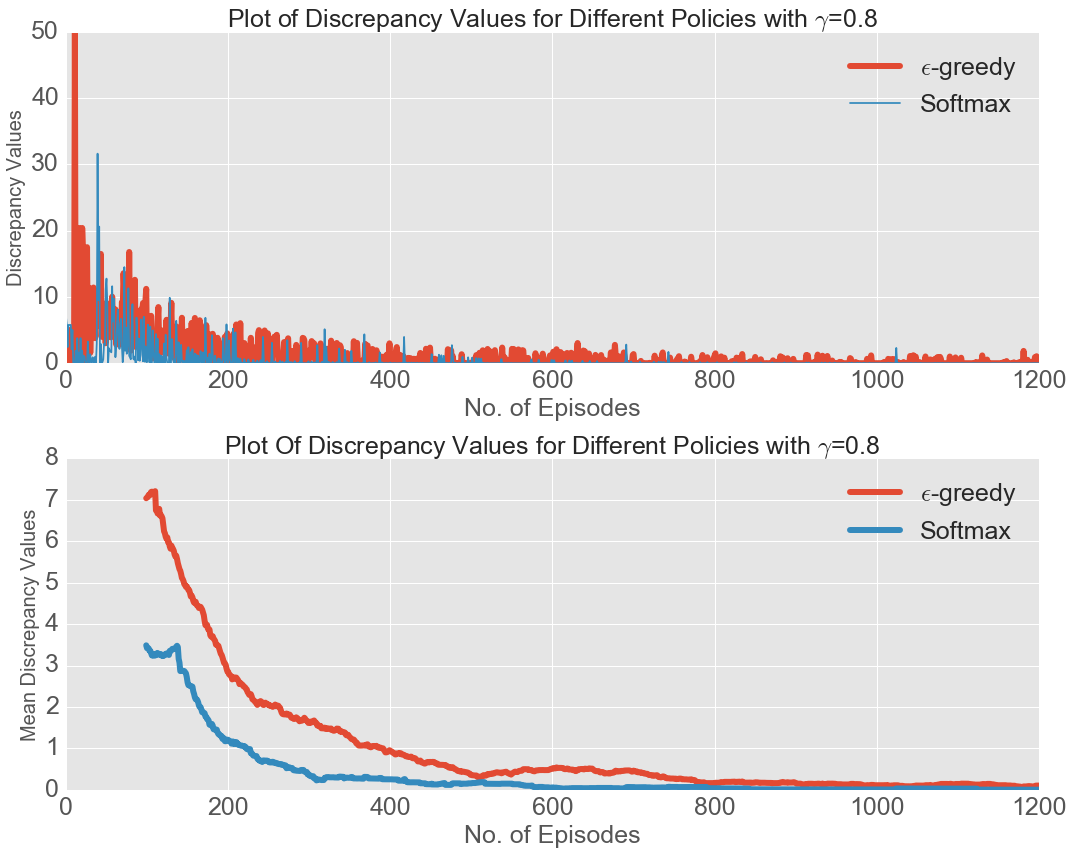

In [43]:
plt.figure(figsize=(15,12))

plt.subplot(211)

plt.plot(discrepancy, linewidth=6, label='$\epsilon$-greedy')
plt.plot(discrepancy2, label='Softmax')

plt.title('Plot of Discrepancy Values for Different Policies with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.legend(fontsize=25, loc=1)
plt.xlim(0,max_iter)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(212)

plt.plot(mean_dis, linewidth=6, label='$\epsilon$-greedy')
plt.plot(mean_dis2, linewidth=6,label='Softmax')

plt.title('Plot Of Discrepancy Values for Different Policies with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.legend(fontsize=25, loc=1)
plt.xlim(0,max_iter)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.tight_layout()

## Comparison of number of Steps 

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text yticklabel objects>)

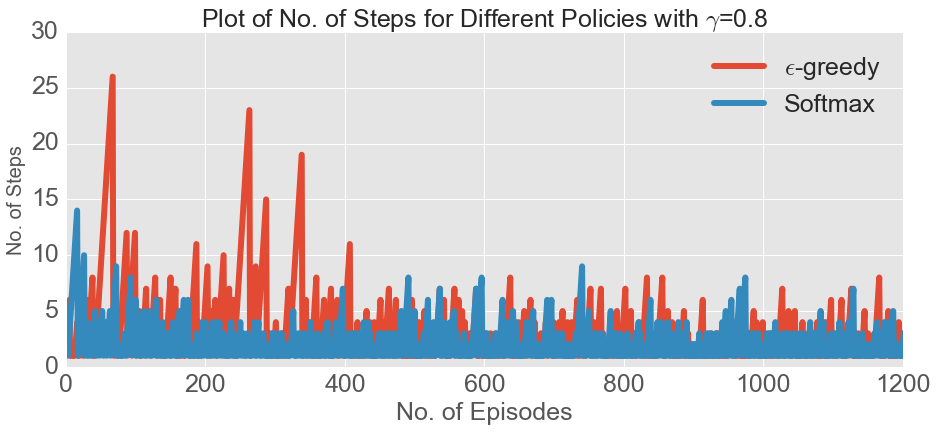

In [44]:
plt.figure(figsize=(15,6))
plt.plot(move_greedy, linewidth=6, label='$\epsilon$-greedy')
plt.plot(move_softmax, linewidth=6,label='Softmax')

plt.title('Plot of No. of Steps for Different Policies with $\gamma$=0.8', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("No. of Steps", fontsize=20)
plt.legend(fontsize=25, loc=1)
plt.xlim(0,max_iter)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Fixed Learning Rate + $\epsilon$-greedy policy

## $\epsilon$-greedy with $\alpha$=0.2

In [45]:
Q4 = np.zeros_like(R)
Q4

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [46]:
move_greedy = []

def QLearning_epsilon(Q,R,explore,gamma,learning_rate,max_iter=max_iter):
            
    for episode in range(0, max_iter):
        #print('Start of episode: ', episode)
        #Random initial position
        initial_pos = random.choice(pos)
        #print(initial_pos)
        #learning rate
        #learning_rate = 1 / (np.sqrt(episode + 2))
        
        #
        #two_terminal_in_a_row = -2
        step = 1
        #While we haven't reached our terminal state, continue searching
        #
        #while two_terminal_in_a_row < 0:
        while initial_pos != 0:   
            #It will be used later for the e-greedy policy
            greedy_threshold = random.uniform(0.0,1.0)
            
            
            #empty list which will be filled with all the available positions
            NEW_pos = []
            #the available position have to be one of the pos variable
            for next_pos in range(0, len(pos)): 
                #search only for positions with a value
                if np.isnan(R[initial_pos, next_pos]) == False:
                #Append to NEW_pos list the Q value of all the available positions
                    NEW_pos.append(Q4[initial_pos, next_pos])
             
            #the maximum value of the above list. It will be used for the movement part
            greedy_Q = max(NEW_pos)
            
            #MOVEMENT PART
            
            #We follow the e-greedy policy
            if greedy_Q > 0.0 and greedy_threshold >= explore:
                #Find the index of the maximum Q value
                 next_state = NEW_pos.index(greedy_Q)
            else:
                #If the greedy_threshold is smaller than the exploration rate, then we select a position at random
                 next_state = randrange(0,len(NEW_pos))
                    
            
            
            #Decrease explore value very slowly in every iteration. This ensures that at the beginning, 
            #when most of the Q values are zeroes, that the algorithm has a higher chance of exploring and 
            #that are many iterations the chances of exploit are higher
            explore = explore * 0.999
            
                       
            #calculate max[Q(next s, all a)]
            list_Q = []
            for future_pos in range(0, len(pos)): 
                #check that the next position isn't empty
                if np.isnan(R[next_state, future_pos]) == False:
                    list_Q.append(Q4[next_state, future_pos])
            #maximum Q
            maximum_Q = max(list_Q)
            
            #define dQ - update rule
            dQ = learning_rate*(R[initial_pos, next_state] + gamma* maximum_Q -  Q4[initial_pos, next_state])
           
            #Q learning update
            Q4[initial_pos, next_state] = Q4[initial_pos, next_state] + dQ
            
            #calculate performance measure
            discrepancy4.append(np.absolute(dQ))         
                     
            move_greedy.append(step)
            step = step + 1
            initial_pos = next_state
           

In [47]:
#Initialise performance measure, policy each time
discrepancy4 = []
QLearning_epsilon(Q4,R,0.8,0.2,0.2)

In [48]:
#calculate value
policy4 = np.argmax(Q4, axis=1)
Value4 = (np.max(Q4, axis=1))
print('Policy\n',policy)
print('V Values\n', Value)
print('Final Q Values:\n',Q)

Policy
 [0 2 0 2 5 2]
V Values
 [  0.          69.99971241 100.          79.99996629  71.99954943
  89.99999999]
Final Q Values:
 [[  0.           0.           0.           0.           0.           0.        ]
 [ -8.47516088  28.85501922  69.99971241  38.88327287  42.33194567
   49.16925676]
 [100.          49.2112256   66.77996037  62.72875357  56.13899718
   70.7270934 ]
 [ -8.41404132  42.44448673  79.99996629  43.04145526  29.95537957
   34.96718119]
 [ -7.14267796  43.65962658  63.78008714  53.72862296  37.81542323
   71.99954943]
 [ -8.71677981  42.32426539  89.99999999  56.41084873  41.65347906
   55.01128242]]


## $\epsilon$-greedy with $\alpha$=0.8

In [49]:
Q5 = np.zeros_like(R)
Q5

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [50]:
move_greedy = []

def QLearning_epsilon(Q,R,explore,gamma,learning_rate,max_iter=max_iter):
            
    for episode in range(0, max_iter):
        #print('Start of episode: ', episode)
        #Random initial position
        initial_pos = random.choice(pos)
        #print(initial_pos)
        #learning rate
        #learning_rate = 1 / (np.sqrt(episode + 2))
        
        #
        #two_terminal_in_a_row = -2
        step = 1
        #While we haven't reached our terminal state, continue searching
        #
        #while two_terminal_in_a_row < 0:
        while initial_pos != 0:   
            #It will be used later for the e-greedy policy
            greedy_threshold = random.uniform(0.0,1.0)
            
            
            #empty list which will be filled with all the available positions
            NEW_pos = []
            #the available position have to be one of the pos variable
            for next_pos in range(0, len(pos)): 
                #search only for positions with a value
                if np.isnan(R[initial_pos, next_pos]) == False:
                #Append to NEW_pos list the Q value of all the available positions
                    NEW_pos.append(Q5[initial_pos, next_pos])
             
            #the maximum value of the above list. It will be used for the movement part
            greedy_Q = max(NEW_pos)
            
            #MOVEMENT PART
            
            #We follow the e-greedy policy
            if greedy_Q > 0.0 and greedy_threshold >= explore:
                #Find the index of the maximum Q value
                 next_state = NEW_pos.index(greedy_Q)
            else:
                #If the greedy_threshold is smaller than the exploration rate, then we select a position at random
                 next_state = randrange(0,len(NEW_pos))
                    
            
            
            #Decrease explore value very slowly in every iteration. This ensures that at the beginning, 
            #when most of the Q values are zeroes, that the algorithm has a higher chance of exploring and 
            #that are many iterations the chances of exploit are higher
            explore = explore * 0.999
            
                       
            #calculate max[Q(next s, all a)]
            list_Q = []
            for future_pos in range(0, len(pos)): 
                #check that the next position isn't empty
                if np.isnan(R[next_state, future_pos]) == False:
                    list_Q.append(Q5[next_state, future_pos])
            #maximum Q
            maximum_Q = max(list_Q)
            
            #define dQ - update rule
            dQ = learning_rate*(R[initial_pos, next_state] + gamma* maximum_Q -  Q5[initial_pos, next_state])
           
            #Q learning update
            Q5[initial_pos, next_state] = Q5[initial_pos, next_state] + dQ
            
            #calculate performance measure
            discrepancy5.append(np.absolute(dQ))         
                     
            move_greedy.append(step)
            step = step + 1
            initial_pos = next_state
           

In [51]:
#Initialise performance measure, policy each time
discrepancy5 = []
QLearning_epsilon(Q5,R,0.8,0.2,0.8)

In [52]:
disc_pd4 = pd.Series(discrepancy4)
mean_dis4 = disc_pd4.rolling(window=100,center=False).mean()

disc_pd5 = pd.Series(discrepancy5)
mean_dis5 = disc_pd5.rolling(window=100,center=False).mean()

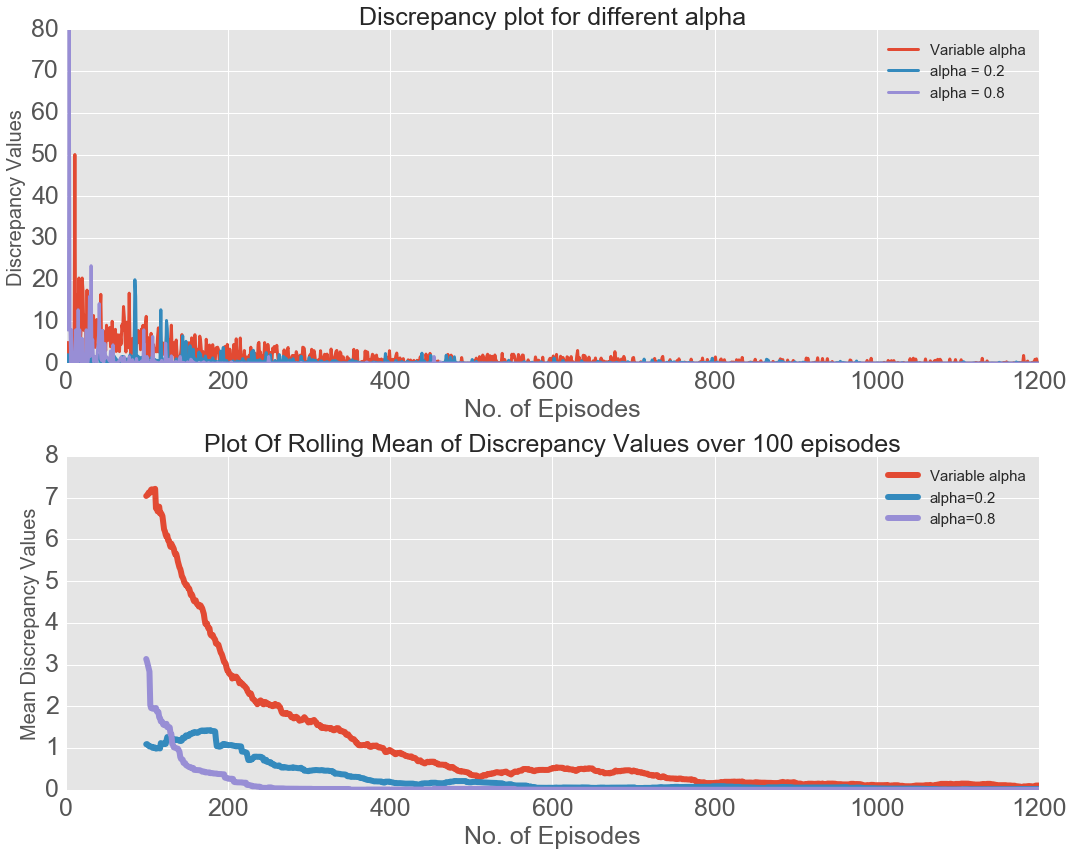

In [53]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.plot(discrepancy, linewidth=3, label="Variable alpha")
plt.plot(discrepancy4, linewidth=3, label="alpha = 0.2")
plt.plot(discrepancy5, linewidth=3, label="alpha = 0.8")
plt.title('Discrepancy plot for different alpha', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)
plt.legend(fontsize=15, loc=1)

plt.subplot(212)
plt.plot(mean_dis, linewidth=6, label='Variable alpha')
plt.plot(mean_dis4, linewidth=6, label='alpha=0.2')
plt.plot(mean_dis5, linewidth=6, label='alpha=0.8')
plt.title('Plot Of Rolling Mean of Discrepancy Values over 100 episodes', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Mean Discrepancy Values", fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,max_iter)
plt.legend(fontsize=15, loc=1)

plt.tight_layout()

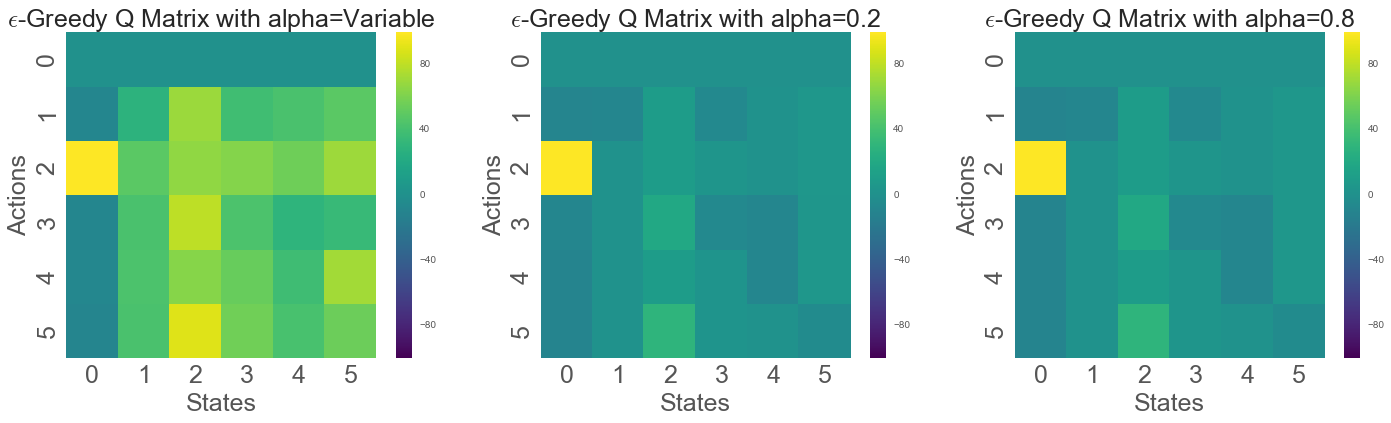

In [54]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.heatmap(Q, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with alpha=Variable", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(132)
sns.heatmap(Q4, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with alpha=0.2", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(133)
sns.heatmap(Q5, cmap=plt.cm.viridis)
plt.title("$\epsilon$-Greedy Q Matrix with alpha=0.8", fontsize=25)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

# Extensions

In [55]:
import scipy
from scipy.fftpack import *
f = lambda x: (x / (x + 2)**1/4)
val =  f(np.arange(1000))

(array([  1.00000000e-07,   1.00000000e-06,   1.00000000e-05,
          1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01]),
 <a list of 9 Text yticklabel objects>)

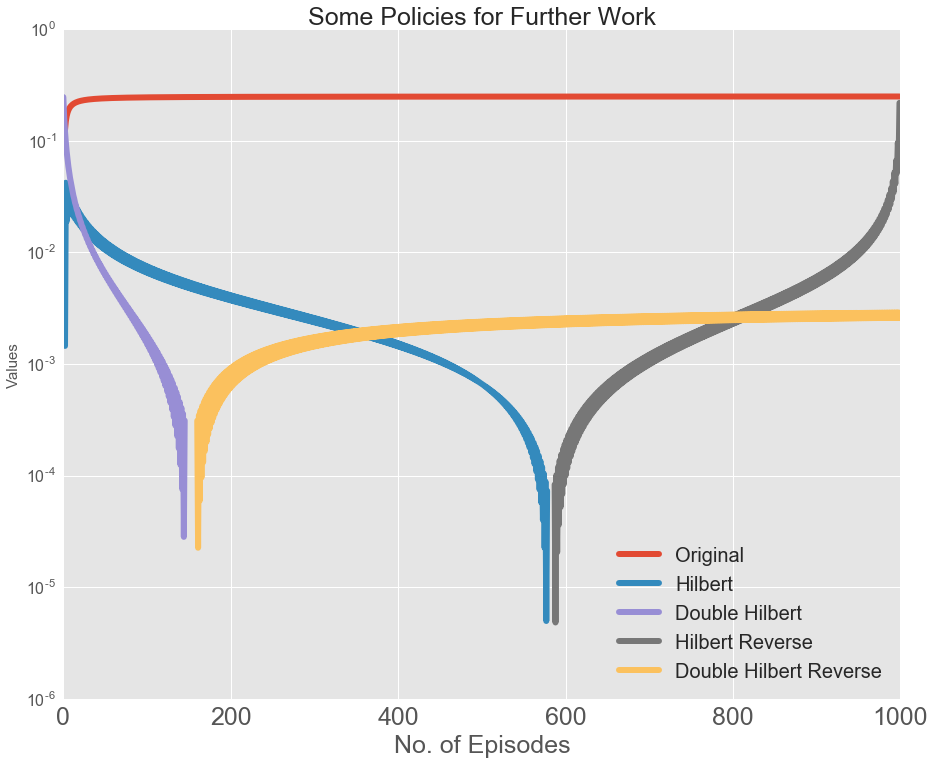

In [56]:
plt.figure(figsize=(15,12))
plt.semilogy(val, label='Original', linewidth=6)
plt.semilogy(hilbert(val), label='Hilbert', linewidth=6)
plt.semilogy(hilbert(hilbert(val)), label='Double Hilbert', linewidth=6)
plt.semilogy(hilbert(val)*-1, label='Hilbert Reverse', linewidth=6)
plt.semilogy(hilbert(hilbert(val))*-1, label='Double Hilbert Reverse', linewidth=6)
plt.legend(fontsize=20, loc=4)

plt.title('Some Policies for Further Work', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

C:\Users\arsha_000\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


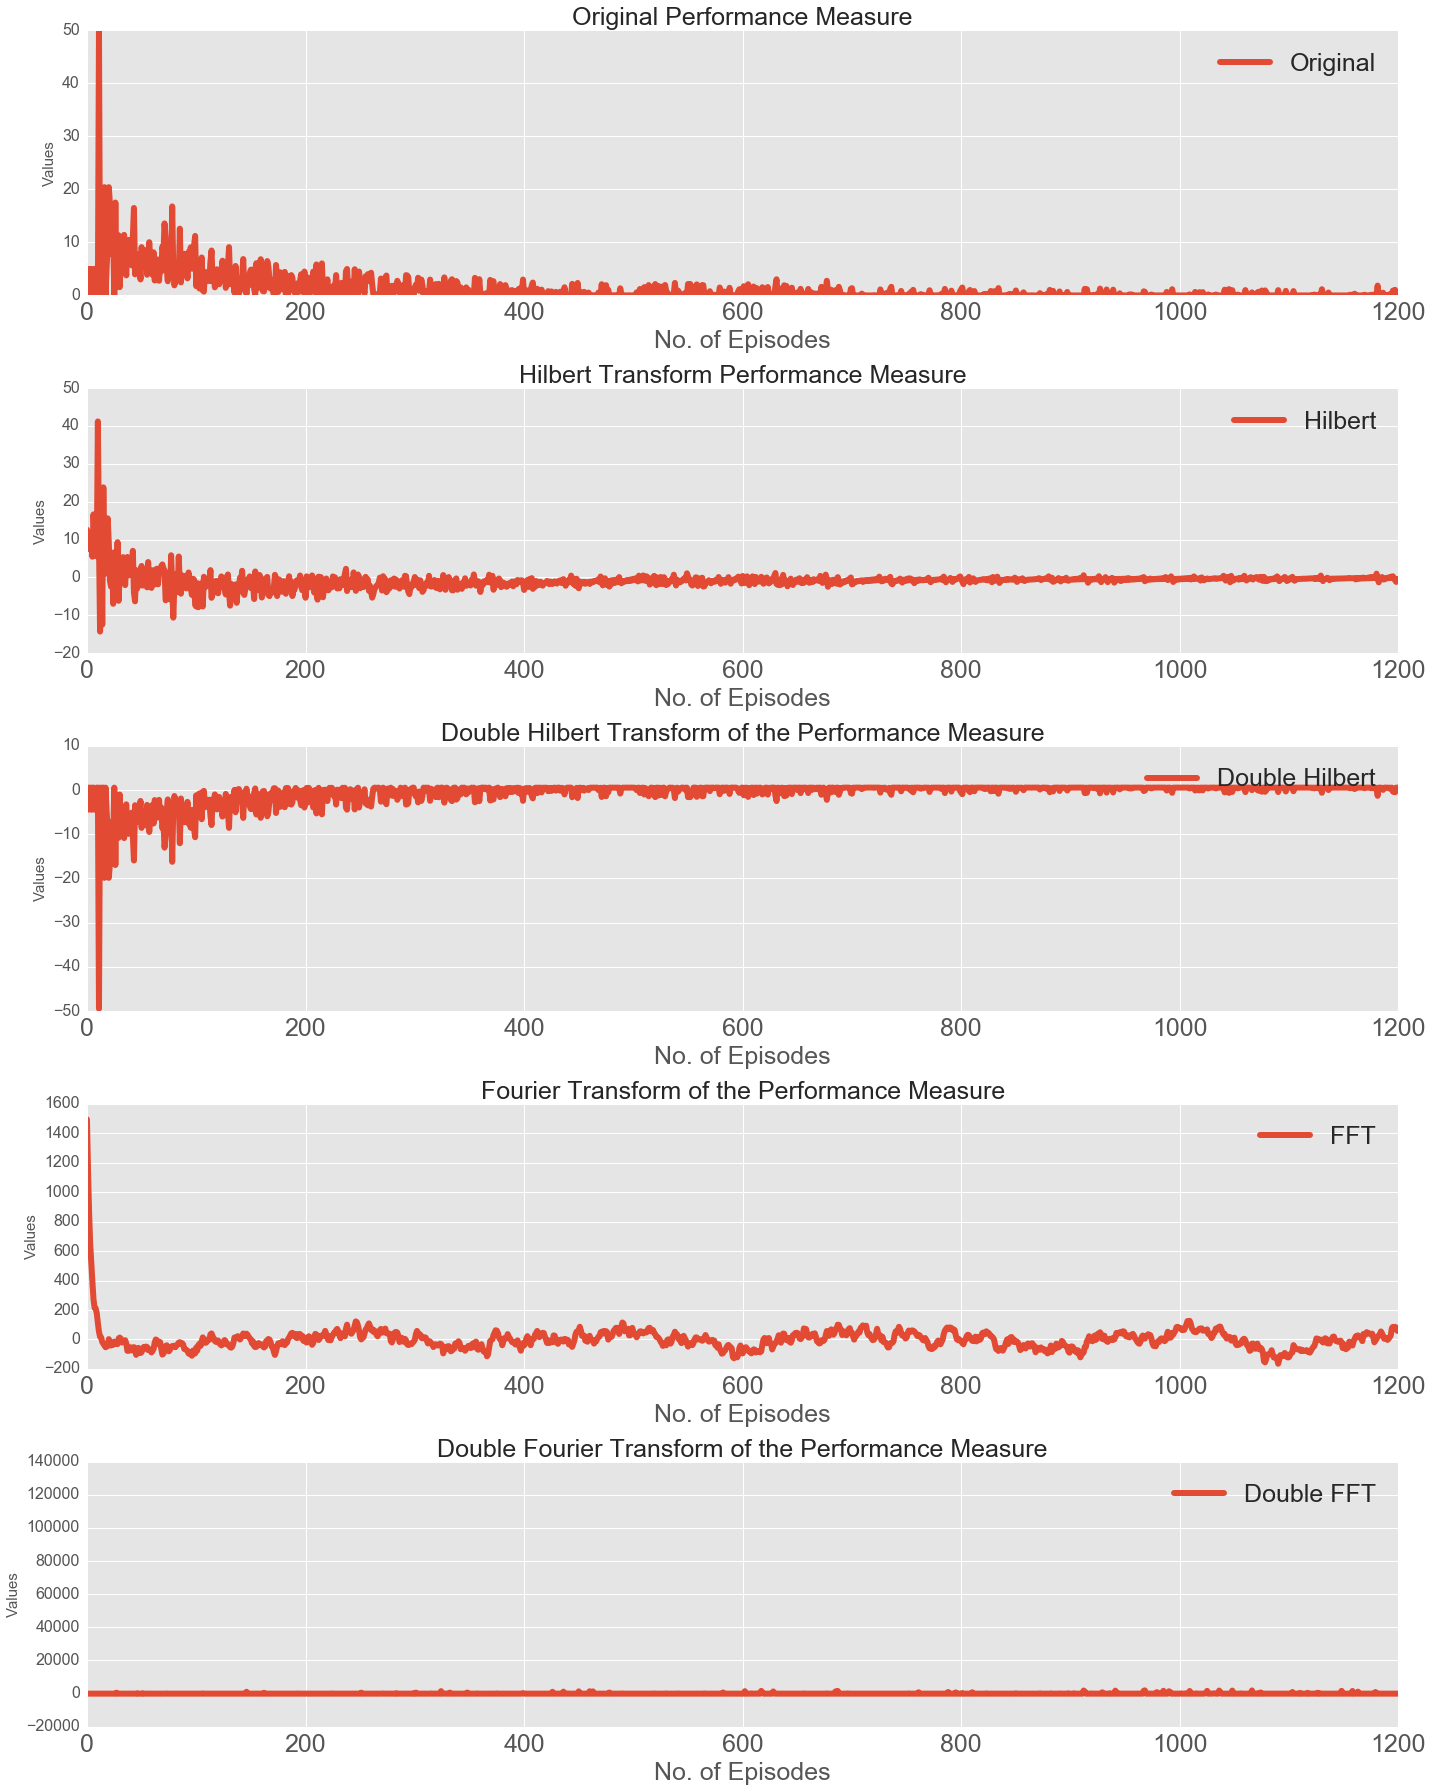

In [70]:
plt.figure(figsize=(20,25))
plt.subplot(511)
plt.plot(discrepancy, label='Original', linewidth=6)
plt.title('Original Performance Measure', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xlim(0,max_iter)
plt.legend(fontsize=25, loc=1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

plt.subplot(512)
plt.plot(hilbert(discrepancy), label='Hilbert', linewidth=6)
plt.title('Hilbert Transform Performance Measure', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xlim(0,max_iter)
plt.legend(fontsize=25, loc=1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

plt.subplot(513)
plt.plot(hilbert(hilbert(discrepancy)), label='Double Hilbert', linewidth=6)
plt.title('Double Hilbert Transform of the Performance Measure', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xlim(0,max_iter)
plt.legend(fontsize=25, loc=1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

plt.subplot(514)
plt.plot(fft(discrepancy), label='FFT', linewidth=6)
plt.title('Fourier Transform of the Performance Measure', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xlim(0,max_iter)
plt.legend(fontsize=25, loc=1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

plt.subplot(515)
plt.plot(fft(fft(discrepancy)), label='Double FFT', linewidth=6)
plt.title('Double Fourier Transform of the Performance Measure', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xlim(0,max_iter)
plt.legend(fontsize=25, loc=1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

plt.tight_layout()